<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/positional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Positional Encoding in Transformers

This notebook implements the sinusoidal positional encoding used in transformer models. The encoding helps the model understand the order of elements in a sequence.

## Theory

Unlike RNNs, transformer models process all elements of a sequence in parallel, losing information about their relative positions. Positional encoding solves this by adding position information to each element's embedding.

### Mathematical Formulation

For a given position $pos$ and dimension $i$, the positional encoding is defined as:

For even dimensions $i$:
$$PE_{(pos,i)} = sin(pos/10000^{2i/d_{model}})$$

For odd dimensions $i$:
$$PE_{(pos,i)} = cos(pos/10000^{2i/d_{model}})$$

Where:
- $pos$ is the position in the sequence (0 to sequence length)
- $i$ is the dimension (0 to model dimension)
- $d_{model}$ is the model's embedding dimension

### Properties

1. **Unique Patterns**: Each position gets a unique encoding pattern
2. **Deterministic**: No parameters to learn
3. **Bounded Values**: Values between -1 and 1
4. **Relative Position Information**: The encoding allows the model to easily attend to relative positions through linear combinations

### Implementation Details

The implementation uses NumPy to compute the encodings efficiently:
1. Create position vector (0 to sequence length)
2. Create frequency vector using exponential decay
3. Apply sin/cos functions to get the final encoding matrix

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def get_positional_encoding(seq_len: int, d_model: int) -> np.ndarray:
    """Generate positional encoding matrix.
    
    Args:
        seq_len: Length of the sequence
        d_model: Dimension of the model (must be even)
    Returns:
        Positional encoding matrix of shape (seq_len, d_model)
    """
    position = np.arange(seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    
    pos_encoding = np.zeros((seq_len, d_model))
    pos_encoding[:, 0::2] = np.sin(position * div_term)
    pos_encoding[:, 1::2] = np.cos(position * div_term)
    
    return pos_encoding

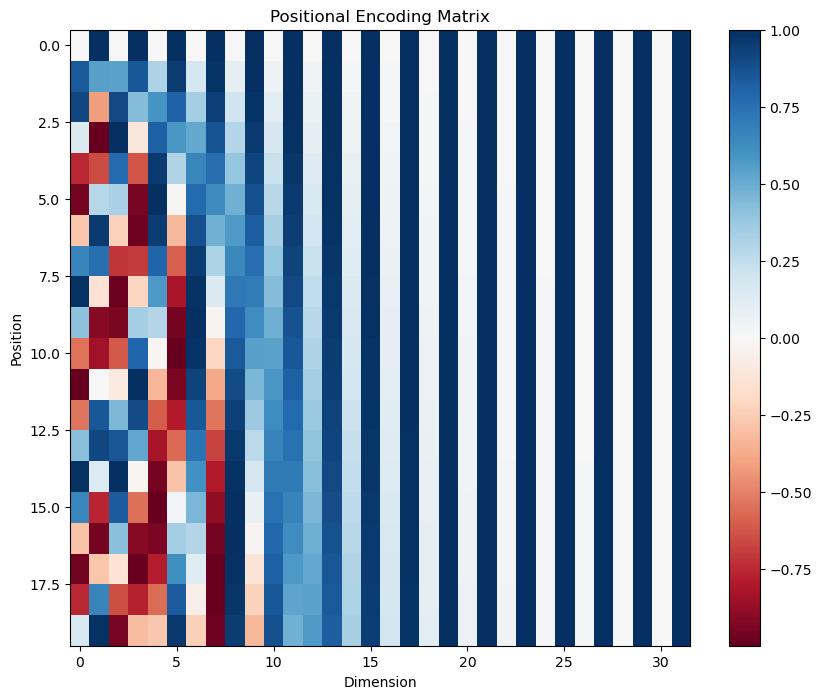

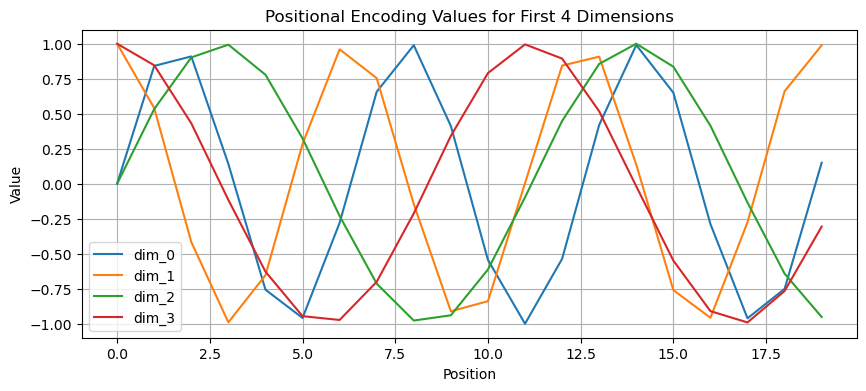

In [14]:
# Generate and visualize positional encodings
seq_len, d_model = 20, 32
pos_encoding = get_positional_encoding(seq_len, d_model)

plt.figure(figsize=(10, 8))
plt.imshow(pos_encoding, cmap='RdBu', aspect='auto')
plt.colorbar()
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.title('Positional Encoding Matrix')
plt.show()

# Plot a few dimensions
plt.figure(figsize=(10, 4))
for i in range(4):
    plt.plot(pos_encoding[:, i], label=f'dim_{i}')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('Positional Encoding Values for First 4 Dimensions')
plt.grid(True)
plt.show()